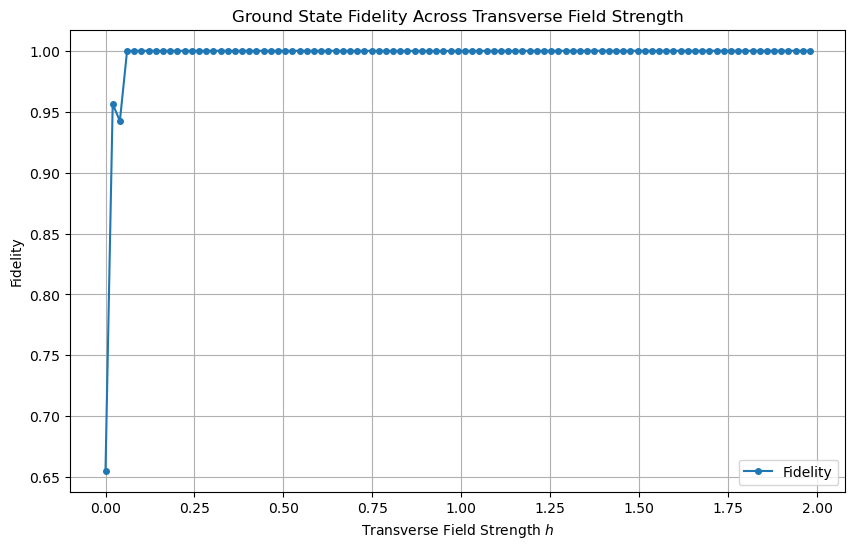

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg
from hw1 import sparse_hamiltonian

def calculate_ground_state(H):
    """Calculate the ground state of a Hamiltonian."""
    eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(H, k=1, which='SA')
    return eigenvectors[:, 0], eigenvalues[0]

# choose multiple system sizes
L_values = [8, 10, 12]
# choose some representative values for h
h_values = [0.3, 1.7]
ground_states = {}  # Dictionary to store ground states and energies

for h in h_values:
    for L in L_values:
        H = sparse_hamiltonian(L, h, periodic=True)
        psi_gs, E_gs = calculate_ground_state(H)
        ground_states[h] = (psi_gs, E_gs)

def correlation_function(psi, L):
    """Calculate the correlation function of a state."""



In [ ]:
delta_h = 0.01  # Small increment in h

fidelities = []  # To store fidelity values

for i, h in enumerate(h_values[:-1]):  # Skip the last value since we look at h and h + delta_h
    H1 = sparse_hamiltonian(L, h, periodic=True)
    H2 = sparse_hamiltonian(L, h + delta_h, periodic=True)
    
    psi_gs_h = calculate_ground_state(H1)
    psi_gs_h_dh = calculate_ground_state(H2)
    
    # Calculate fidelity and add to the list
    fidelity = np.abs(np.dot(psi_gs_h.conj().T, psi_gs_h_dh))
    fidelities.append(fidelity)

plt.figure(figsize=(10, 6))
plt.plot(h_values[:-1], fidelities, label='Fidelity', marker='o', linestyle='-', markersize=4)
plt.xlabel('Transverse Field Strength $h$')
plt.ylabel('Fidelity')
plt.title('Ground State Fidelity Across Transverse Field Strength')
plt.grid(True)
plt.legend()
plt.savefig('fidelity_vs_h.png')